# Lab 10
# Dimensionality Reduction
## Submitted to: Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
sn.set(style='ticks', color_codes=True, font_scale=1)

white_wine = pd.read_csv('../Dataset/winequality-white.csv', sep=';')
white_wine['wine_type'] = 0
red_wine = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
red_wine['wine_type'] = 1

wine_data = pd.concat([white_wine, red_wine])
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [4]:
scaler = StandardScaler()

data = wine_data.iloc[:,:11].values
scaled_features = scaler.fit_transform(data)

wine_data_scaled = pd.DataFrame(scaled_features, index=wine_data.index, columns=wine_data.columns[:11])
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data_scaled,
                                                    wine_data.iloc[:, 12],
                                                    test_size=0.2,
                                                    random_state=42)

Applying logistic regression without any dimensionality reduction

In [6]:
model_ll = LogisticRegression(penalty='l2', solver='saga', max_iter=10, multi_class='ovr')
model_ll.fit(X_train, Y_train)

print("Train Score: ", model_ll.score(X_train, Y_train))
print("Test Score: ", model_ll.score(X_test, Y_test), '\n')

Train Score:  0.9926880892822783
Test Score:  0.9884615384615385 



/home/prateek/anaconda3/envs/dltf/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Applying PCA over the dataset

In [7]:
wine_data_vals = wine_data_scaled.values

pca = PCA(n_components=2, svd_solver='full', random_state=42)
reduced_wine_data = pca.fit_transform(X_train)
reduced_wine_data.shape

(5197, 2)

In [8]:
model_ll = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial')
model_ll.fit(reduced_wine_data, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [1]:
print(model_ll.score(reduced_wine_data, Y_train))
print(model_ll.score(pca.transform(X_test), Y_test))

0.9659534346738503
0.9807692307692307


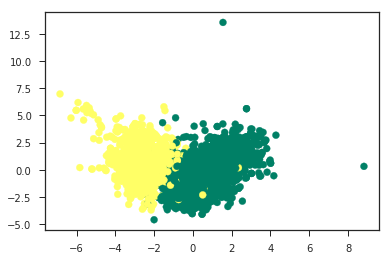

In [10]:
plt.scatter(reduced_wine_data[:, 0], reduced_wine_data[:, 1], c=Y_train, cmap='summer')

Applying LDA over the dataset

In [11]:
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=3)
wine_data_reduced = lda.fit_transform(X_train, Y_train)

In [12]:
wine_data_reduced.shape

(5197, 1)

In [13]:
wine_data_reduced

array([[-0.5634886 ],
       [-0.53612547],
       [-0.15322816],
       ...,
       [ 1.34187962],
       [ 1.35577714],
       [-0.22737771]])

Applying KPCA on the dataset

In [14]:
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
wine_data_reduced = kpca.fit_transform(X_train)

In [15]:
print(model_ll.score(reduced_wine_data, Y_train))
print(model_ll.score(kpca.transform(X_test), Y_test))

0.9859534346738503
0.7584615384615384


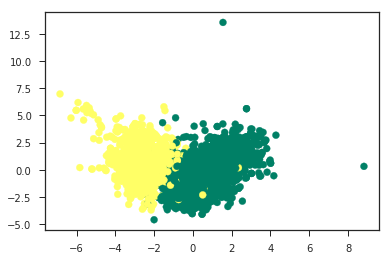

In [16]:
plt.scatter(reduced_wine_data[:, 0], reduced_wine_data[:, 1], c=Y_train, cmap='summer')